## Testando com mais tempo e mais dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import extractor as ext

In [5]:
fbase = pd.read_csv('./1_filtered.csv', header=None)
fbase.head()

,0,1,2,3
0,8.456798,-4.466378,7.215951,0.019221
1,8.454815,-4.464132,7.212556,0.019295
2,8.453542,-4.461002,7.207107,0.019680
3,8.449433,-4.457170,7.201194,0.020556
4,8.440568,-4.453560,7.195996,0.020409


In [6]:
extractor = ext.RecordExtractor(norm=True) # set 0 as first item
cycles = extractor.read_sample(fbase)
np.array(cycles).shape

(4, 5)

In [7]:
import dataset_creation as dtc

ds, offsetted_ds = dtc.create_dataset(fbase, time_ms=600)

In [8]:
offsetted_ds.head(10)

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.029405,10.132518,350,0.774739,0.714504,0.021299,0.031459,12.459358,467,...,52,0.925832,0.824661,0.007794,0.006325,2.618580,20,0.743834,0.720893,0.004525
1,rest,0.338764,145.118427,1123,0.878671,0.851127,0.258561,0.291927,146.870687,1109,...,993,0.963864,0.962200,0.084331,0.010679,3.833016,59,0.719470,0.523739,0.007678
2,rest,0.021671,7.213547,213,0.759029,0.660268,0.015156,0.022970,7.044677,210,...,60,0.839379,0.676369,0.007350,0.022640,7.050325,207,0.522047,0.286833,0.012988
3,rest,0.052656,18.262196,633,0.766194,0.699608,0.037299,0.086512,52.839819,994,...,212,0.891606,0.740163,0.013117,0.006153,2.143498,12,0.658940,0.559863,0.003998
4,rest,0.027199,9.609158,371,0.848054,0.820414,0.021310,0.030284,12.305054,460,...,81,1.045390,1.018652,0.009075,0.002165,1.073322,0,0.943854,0.961897,0.001745
5,extension,0.027130,10.018519,374,0.879675,0.832281,0.021583,0.033779,14.275140,523,...,77,1.061278,0.952614,0.008027,0.003029,1.341017,0,0.872345,0.847494,0.002396
6,extension,0.034186,12.388564,475,0.841070,0.791399,0.025929,0.037040,15.984961,581,...,123,1.026116,1.002284,0.009912,0.004046,1.677856,1,0.816494,0.805234,0.003052
7,extension,0.048177,17.394558,637,0.821084,0.780883,0.036100,0.052095,20.476092,695,...,247,0.962574,0.919953,0.016705,0.004994,2.093740,0,0.868820,0.867075,0.003876
8,extension,0.024615,9.572541,353,0.894224,0.848603,0.019380,0.033423,13.852553,529,...,115,0.980683,0.938278,0.010596,0.003137,1.377734,0,0.904300,0.912550,0.002537
9,extension,0.021677,10.462684,398,1.059671,1.053949,0.016724,0.025740,11.119378,431,...,141,1.219673,1.259898,0.008095,0.007281,3.106201,11,0.806791,0.799644,0.005542


In [34]:
bases =[ ]
for i in range(1, 41):
    b = pd.read_csv(f'./{i}_filtered.csv', header=None)
    bases.append(b)

ds_s = []
for i in (bases):
    _, d = dtc.create_dataset(i, time_ms=1000) # Trying with 1 second delay
    ds_s.append(d)


full_ds = pd.concat(ds_s)
full_ds

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.029405,10.132518,350,0.774739,0.714504,0.021299,0.031459,12.459358,467,...,52,0.925832,0.824661,0.007794,0.006325,2.618580,20,0.743834,0.720893,0.004525
1,rest,0.338764,145.118427,1123,0.878671,0.851127,0.258561,0.291927,146.870687,1109,...,993,0.963864,0.962200,0.084331,0.010679,3.833016,59,0.719470,0.523739,0.007678
2,rest,0.021671,7.213547,213,0.759029,0.660268,0.015156,0.022970,7.044677,210,...,60,0.839379,0.676369,0.007350,0.022640,7.050325,207,0.522047,0.286833,0.012988
3,rest,0.052656,18.262196,633,0.766194,0.699608,0.037299,0.086512,52.839819,994,...,212,0.891606,0.740163,0.013117,0.006153,2.143498,12,0.658940,0.559863,0.003998
4,rest,0.027199,9.609158,371,0.848054,0.820414,0.021310,0.030284,12.305054,460,...,81,1.045390,1.018652,0.009075,0.002165,1.073322,0,0.943854,0.961897,0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,pronation,0.051908,21.285956,732,0.921814,0.892227,0.038533,0.051426,25.595892,798,...,298,0.861822,0.822201,0.018766,0.084771,32.562481,866,0.773028,0.693603,0.060939
46,pronation,0.205976,108.030998,1107,1.070241,1.081496,0.160446,0.248924,137.429395,1125,...,972,0.873863,0.863877,0.088140,0.004513,1.437879,24,0.575745,0.517531,0.002381
47,pronation,0.159253,76.723136,1051,1.019122,0.974582,0.120020,0.187391,92.467871,1091,...,908,0.808109,0.805141,0.076900,0.015399,8.049713,268,0.883472,0.820830,0.011404
48,pronation,0.035774,15.561659,571,0.931796,0.883384,0.026937,0.039262,18.269332,695,...,134,0.784339,0.752110,0.015460,0.002154,0.981844,0,0.882742,0.895471,0.001741


In [11]:
full_ds['class'].unique()

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [12]:
full_ds.loc[full_ds['class'] == 'rest' ].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.111767,53.964220,665.200000,0.912258,0.869833,0.085494,0.106413,52.678048,739.800000,0.963532,...,253.333333,0.905846,0.850403,0.023270,0.026985,11.061141,177.200000,0.779045,0.723828,0.019778
std,0.120860,63.068288,361.858733,0.127858,0.160204,0.093732,0.101525,53.481190,336.059349,0.130157,...,328.873329,0.099489,0.119404,0.028270,0.051079,21.781705,350.318263,0.115780,0.185291,0.038422
min,0.021671,7.213547,213.000000,0.759029,0.660268,0.015156,0.022970,7.044677,210.000000,0.675416,...,28.000000,0.743490,0.676369,0.007350,0.001733,0.753654,0.000000,0.522047,0.286833,0.001377
25%,0.028302,9.870838,360.500000,0.805920,0.768038,0.021304,0.030872,12.382206,459.000000,0.904919,...,54.500000,0.819622,0.754702,0.009956,0.004122,1.917880,2.500000,0.722627,0.644137,0.003184
50%,0.042871,14.709314,575.000000,0.878671,0.820414,0.032669,0.057112,24.868982,737.000000,0.971755,...,115.000000,0.901484,0.824661,0.013018,0.006481,2.618580,12.000000,0.745242,0.700413,0.004681
75%,0.194940,97.354129,1088.500000,0.997616,0.953810,0.152564,0.157300,77.033198,1051.000000,1.038309,...,251.000000,0.991748,0.966123,0.018561,0.014901,5.441671,133.000000,0.866512,0.887649,0.010333
max,0.349094,170.873302,1135.000000,1.136072,1.163615,0.274352,0.317278,167.670415,1131.000000,1.198514,...,1051.000000,1.045390,1.018652,0.099301,0.168354,76.132883,1046.000000,0.951116,0.963753,0.128698


In [13]:
full_ds.loc[full_ds['class'] == 'extension'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.054443,23.765261,564.200000,0.954062,0.911810,0.040959,0.059832,25.959302,672.266667,0.960840,...,173.800000,0.937469,0.897026,0.014848,0.005844,2.465861,12.333333,0.827921,0.813032,0.004472
std,0.053123,24.075136,296.512635,0.120959,0.127231,0.039262,0.042518,19.106946,229.230223,0.051310,...,120.757254,0.147168,0.158269,0.005484,0.002601,1.096250,20.314199,0.038377,0.046167,0.001948
min,0.010405,4.286738,50.000000,0.819421,0.742541,0.008329,0.023810,9.783558,370.000000,0.879515,...,14.000000,0.616751,0.563660,0.006848,0.002294,0.865361,0.000000,0.749787,0.735951,0.001760
25%,0.025442,9.839115,363.500000,0.852384,0.801968,0.019851,0.032782,13.209735,489.000000,0.932085,...,77.000000,0.862645,0.832066,0.010254,0.003592,1.527795,0.000000,0.809023,0.784717,0.002795
50%,0.028473,13.322994,507.000000,0.904270,0.867614,0.021583,0.048465,20.476092,635.000000,0.957990,...,141.000000,0.964019,0.919953,0.014365,0.006293,2.798211,4.000000,0.829681,0.805234,0.004818
75%,0.063990,25.990742,773.000000,1.037940,1.005536,0.047838,0.069702,32.750842,875.500000,0.992634,...,253.000000,1.020595,0.974715,0.019236,0.007430,3.062589,14.500000,0.844434,0.839901,0.005680
max,0.196273,79.271478,1073.000000,1.233006,1.177465,0.144099,0.182282,79.681393,1076.000000,1.049334,...,466.000000,1.219673,1.259898,0.023504,0.010784,4.537383,77.000000,0.904300,0.912550,0.007946


In [14]:
full_ds.loc[full_ds['class'] == 'flexion'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000
mean,0.092072,44.526721,631.800000,0.930226,0.887203,0.069173,0.100244,49.817476,696.60000,0.964665,...,237.400000,0.900848,0.835383,0.020481,0.012862,5.014160,112.60000,0.742553,0.665383,0.008875
std,0.093588,49.377793,385.641062,0.125567,0.142072,0.070080,0.099827,53.847056,345.18852,0.116808,...,306.606029,0.130761,0.135698,0.023381,0.015940,6.759141,215.86464,0.116028,0.199350,0.011341
min,0.016188,5.866396,141.000000,0.783339,0.677901,0.012312,0.015765,5.963357,174.00000,0.775962,...,6.000000,0.717016,0.612035,0.007221,0.001929,0.798666,0.00000,0.534105,0.119438,0.001446
25%,0.026367,9.095564,313.500000,0.811999,0.782043,0.019877,0.029281,11.781774,408.00000,0.859339,...,34.000000,0.773565,0.755363,0.009514,0.004646,1.710887,0.00000,0.701506,0.623720,0.003272
50%,0.032051,14.412756,532.000000,0.884556,0.829583,0.024742,0.050339,23.048068,719.00000,0.958881,...,100.000000,0.886002,0.790050,0.011455,0.006651,2.473841,12.00000,0.715602,0.673430,0.004793
75%,0.166248,87.420174,1090.000000,1.038209,1.034941,0.127967,0.158886,84.176028,1059.00000,1.072665,...,280.000000,1.007445,0.959109,0.016445,0.014368,5.169531,116.50000,0.790086,0.750228,0.009973
max,0.298846,144.742291,1125.000000,1.123421,1.096974,0.226534,0.301415,160.530660,1130.00000,1.131712,...,1006.000000,1.098891,1.036971,0.085268,0.063900,27.564251,798.00000,0.938084,0.942440,0.046441


In [35]:
def remove_outliers(ds, col):
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

In [36]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_RMS')
rest_ds.shape

(96, 25)

In [37]:
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

extension_ds = remove_outliers(extension_ds, 'SENSOR0_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_RMS')
extension_ds.shape

(110, 25)

In [38]:
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_RMS')
flexion_ds.shape

(100, 25)

In [39]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.029405,10.132518,350,0.774739,0.714504,0.021299,0.031459,12.459358,467,...,52,0.925832,0.824661,0.007794,0.006325,2.618580,20,0.743834,0.720893,0.004525
2,rest,0.021671,7.213547,213,0.759029,0.660268,0.015156,0.022970,7.044677,210,...,60,0.839379,0.676369,0.007350,0.022640,7.050325,207,0.522047,0.286833,0.012988
3,rest,0.052656,18.262196,633,0.766194,0.699608,0.037299,0.086512,52.839819,994,...,212,0.891606,0.740163,0.013117,0.006153,2.143498,12,0.658940,0.559863,0.003998
4,rest,0.027199,9.609158,371,0.848054,0.820414,0.021310,0.030284,12.305054,460,...,81,1.045390,1.018652,0.009075,0.002165,1.073322,0,0.943854,0.961897,0.001745
0,rest,0.030082,14.406165,554,1.061952,1.064930,0.022049,0.057112,24.868982,737,...,221,1.020640,0.991334,0.013831,0.003593,1.692262,0,0.951116,0.963753,0.002854


In [40]:
def get_score_and_accuracy(X, Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)


    return pd.DataFrame([dr, dr_svm, dr_tree])


In [53]:
class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.758065,0.419355
1,SVM,0.741935,0.516129
2,Tree Classifier,0.870968,0.338710


Remover offsets e verificar por que os dados estão estranhos

In [54]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_APPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_APPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_APPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((148, 25), (144, 25), (148, 25))

In [61]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_APPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.965909,0.295455
1,SVM,0.761364,0.397727
2,Tree Classifier,0.840909,0.386364


In [62]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((96, 25), (106, 25), (104, 25))

In [63]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.029405,10.132518,350,0.774739,0.714504,0.021299,0.031459,12.459358,467,...,52,0.925832,0.824661,0.007794,0.006325,2.618580,20,0.743834,0.720893,0.004525
2,rest,0.021671,7.213547,213,0.759029,0.660268,0.015156,0.022970,7.044677,210,...,60,0.839379,0.676369,0.007350,0.022640,7.050325,207,0.522047,0.286833,0.012988
3,rest,0.052656,18.262196,633,0.766194,0.699608,0.037299,0.086512,52.839819,994,...,212,0.891606,0.740163,0.013117,0.006153,2.143498,12,0.658940,0.559863,0.003998
4,rest,0.027199,9.609158,371,0.848054,0.820414,0.021310,0.030284,12.305054,460,...,81,1.045390,1.018652,0.009075,0.002165,1.073322,0,0.943854,0.961897,0.001745
0,rest,0.030082,14.406165,554,1.061952,1.064930,0.022049,0.057112,24.868982,737,...,221,1.020640,0.991334,0.013831,0.003593,1.692262,0,0.951116,0.963753,0.002854


In [64]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.758065,0.338710
1,SVM,0.822581,0.419355
2,Tree Classifier,0.822581,0.403226


In [65]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_SAMPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_SAMPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_SAMPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((141, 25), (140, 25), (143, 25))

In [66]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.764706,0.352941
1,SVM,0.670588,0.470588
2,Tree Classifier,0.776471,0.352941


In [67]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.788235,0.388235
1,SVM,0.729412,0.447059
2,Tree Classifier,0.776471,0.388235


In [68]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_WAMP" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.752941,0.423529
1,SVM,0.647059,0.482353
2,Tree Classifier,0.811765,0.341176


In [69]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_SAMPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.823529,0.376471
1,SVM,0.811765,0.364706
2,Tree Classifier,1.035294,0.200000


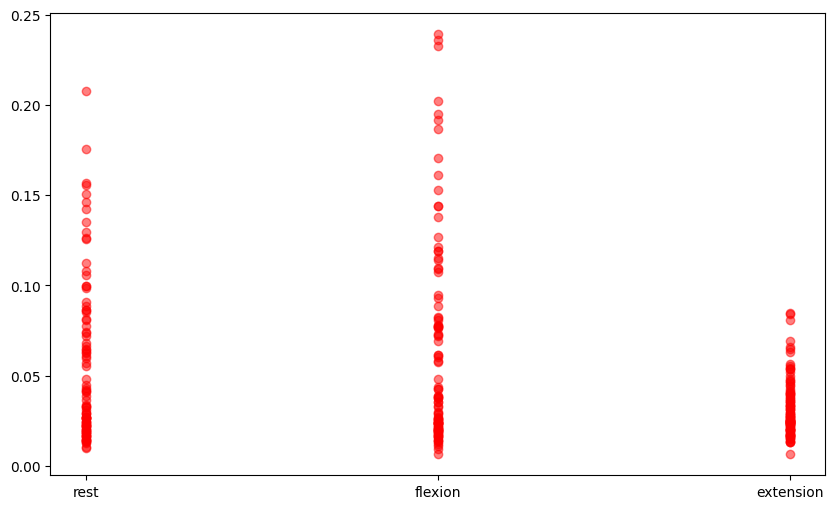

In [70]:
classes = ['rest', 'flexion', 'extension']

rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')


plt.figure(figsize=(10, 6))
plt.scatter(rest_ds['class'], rest_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(flexion_ds['class'], flexion_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(extension_ds['class'], extension_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)